<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
import numpy as np

url = "boston.txt"
raw_df = pd.read_csv(url, delim_whitespace=True, skiprows=22, header=None)

# Step 2: Flatten the values and remove NaNs
flat_values = raw_df.values.flatten()
clean_values = flat_values[~np.isnan(flat_values)]

# Step 3: Reshape into a DataFrame with 14 columns
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.DataFrame(clean_values.reshape(-1, len(columns)), columns=columns)

# Step 4: Preview the data
print(df.head())


<ipython-input-3-2e66dc20dc83>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  raw_df = pd.read_csv(url, delim_whitespace=True, skiprows=22, header=None)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:
#    For the "Median value of owner-occupied homes" provide a boxplot
#    Provide a  bar plot for the Charles river variable. 
#    Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age 
#    variable into three groups of 35 years and younger, between 35 and 70 years and 
#    70 years and older)
#    Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#    and the proportion of non-retail business acres per town. What can you say about 
#    the relationship?
#    Create a histogram for the pupil to teacher ratio variable

#### Add your code below following the instructions given in the course to complete the peer graded assignment


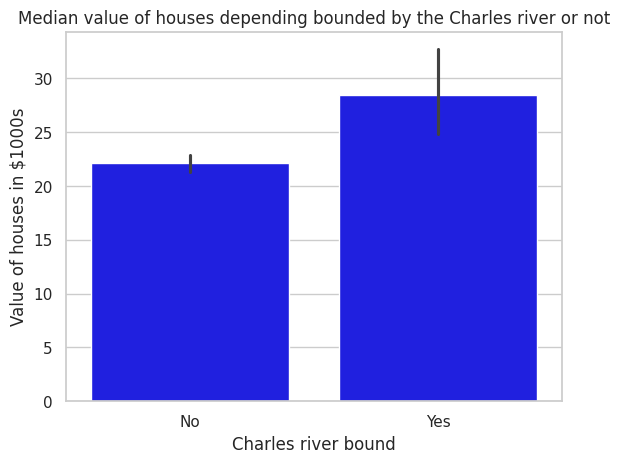

In [5]:
#1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
#state the hypothesis
#H0 - there is no significant difference in the median value between houses bounded by the Charles river and those not bounded
#Ha - there is a significant difference in the median value between houses bounded by the Charles river and those not bounded

#show MEDV in a bar plot
sns.set(style='whitegrid')
df['CHAS_label'] = df['CHAS'].map({0: 'No', 1: 'Yes'})
ax = sns.barplot(x='CHAS_label', y='MEDV', data=df, color ='blue')
ax.set(xlabel='Charles river bound', ylabel='Value of houses in $1000s', title='Median value of houses depending bounded by the Charles river or not')
pyplot.show()


In [6]:
#run test statistics - t-test for independent samples
scipy.stats.levene(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [7]:
scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'],
                      df[df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [8]:
#state the conclusion
#Since the p-value is less than alpha value 0.05 we reject the null hypothesis 
#as there is enough proof that there is a statistical difference in the median 
#of both categories of houses. Charles river bounded houses have higher values

In [9]:
#2. Is there a difference in median values of houses of each proportion of owner-occupied 
#units built before 1940? (ANOVA)

In [10]:
#Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)
df.loc[(df['AGE'] <= 35), 'age-group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'age-group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] > 70), 'age-group'] = '70 years and older'

In [11]:
#state the hypothesis
#H0 - there is no difference in the median value of houses of each proportion of owner-occupied units built before 1940
#Ha - there is a significant difference between one of the medians of house value of each proportion of owner-occupied units built before 1940

<ipython-input-12-0e3130125cbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age-group', y='MEDV', data=df, palette='Set2')


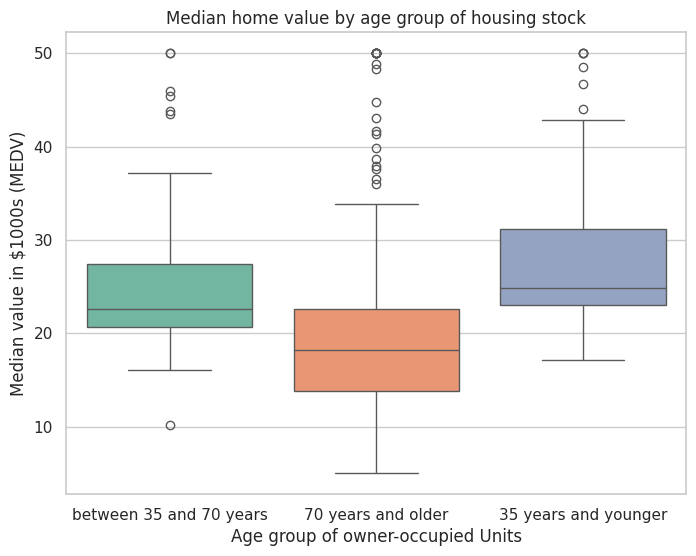

In [12]:
#Provide a boxplot for the MEDV variable vs the AGE variable
pyplot.figure(figsize=(8,6))
sns.boxplot(x='age-group', y='MEDV', data=df, palette='Set2')
pyplot.title("Median home value by age group of housing stock")
pyplot.xlabel("Age group of owner-occupied Units")
pyplot.ylabel("Median value in $1000s (MEDV)")
pyplot.show()

In [13]:
#Test for equality of variance
scipy.stats.levene(df[df['age-group'] == '35 years and younger']['MEDV'],
                   df[df['age-group'] == 'between 35 and 70 years']['MEDV'],
                   df[df['age-group'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
younger = df[df['age-group'] == '35 years and younger']['MEDV']
middle = df[df['age-group'] == 'between 35 and 70 years']['MEDV']
older = df[df['age-group'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(younger, middle, older)
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [16]:
#state the conclusion
#Since the p-value is less than alpha value 0.05 we reject the null hypothesis 
#as there is significant evidence that at least one of the medians differ.
#According to the data the older the building the lower the median value of houses

In [17]:
#3. Can we conclude that there is no relationship between Nitrix oxide concentration 
#and proportion of non-retail business acres per town? (Pearson Correlation)

In [18]:
#state the hypothesis
#H0 - there is no relationship between Nitrix oxide concentration and 
#proportion of non-retail business acres per town
#Ha - there is a correlation between Nitrix oxide concentration and
#proportion of non-retail business acres per town

In [19]:
#    Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#    and the proportion of non-retail business acres per town. What can you say about 
#    the relationship?

Text(0, 0.5, 'Nitric Oxides concentration (NOX)')

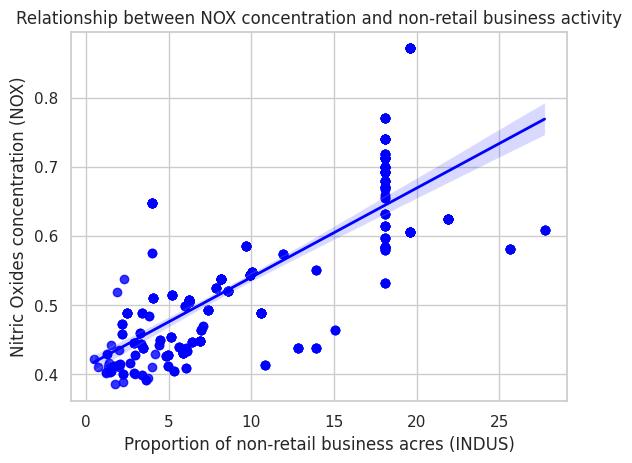

In [20]:
ax = sns.regplot(x='INDUS', y='NOX', data=df, color="blue", line_kws={"linewidth": 2})
pyplot.title("Relationship between NOX concentration and non-retail business activity")
pyplot.xlabel("Proportion of non-retail business acres (INDUS)")
pyplot.ylabel("Nitric Oxides concentration (NOX)")


In [21]:
scipy.stats.pearsonr(df['INDUS'],df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [22]:
#state the conclusion
#Since the p-value is less than alpha value 0.05 we reject the null hypothesis 
#as there is a correlation between Nitric Oxides concentration and the proportion
#of non-retail business acres. There is a statistically significant positive correlation.
#The regression line shows a positive relationship:
#The lower the proportion of non-retail business acres the lesser the NOX concentration

In [23]:
#4. What is the impact of an additional weighted distance to the five Boston
#employment centres on the median value of owner-occupied homes? (Regression analysis)

In [24]:
#state the hypothesis
#H0 - the distance to the five Boston
#employment centres doesn't impacts the median value of owner-occupied homes
#Ha - the distance to the five Boston employment centres
#has an impact on the median value of owner-occupied homes

Text(0, 0.5, 'Median value in $1000s(MEDV)')

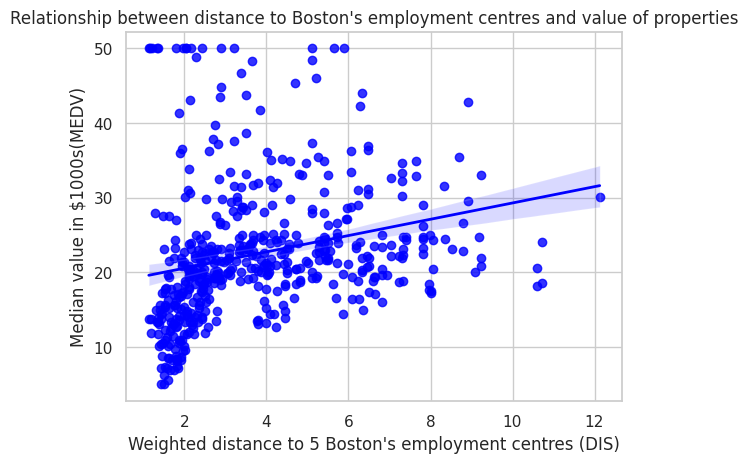

In [25]:
ax = sns.regplot(x='DIS', y='MEDV', data=df, color="blue", line_kws={"linewidth": 2})
pyplot.title("Relationship between distance to Boston's employment centres and value of properties")
pyplot.xlabel("Weighted distance to 5 Boston's employment centres (DIS)")
pyplot.ylabel("Median value in $1000s(MEDV)")

In [26]:
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        14:18:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Since the p-value is less than alpha value 0.05 we reject the null hypothesis 
#as there is a correlation between the housing value and the distance from emplotyment centres
# There is a statistically significant positive correlation. The regression line shows a positive relationship:
# homes farther from employment centers tend to be more valuable. For every distance unit the value rises 1090 $

In [28]:
#Provide a histogram for the pupil to teacher ratio variable

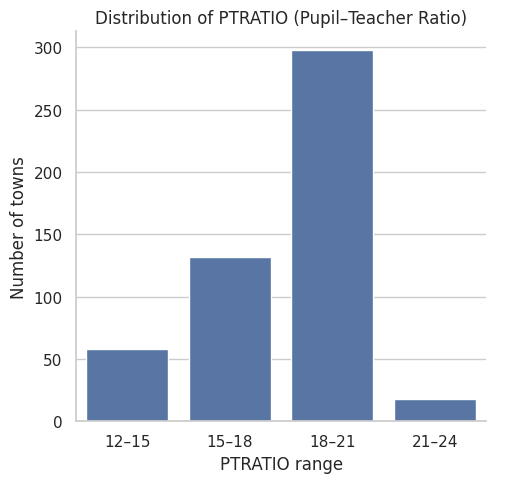

In [29]:
df['PTRATIO_bin'] = pd.cut(df['PTRATIO'], bins=[12, 15, 18, 21, 24], labels=['12–15', '15–18', '18–21', '21–24'])
sns.catplot(x='PTRATIO_bin', kind='count', data=df)
pyplot.title('Distribution of PTRATIO (Pupil–Teacher Ratio)')
pyplot.xlabel('PTRATIO range')
pyplot.ylabel('Number of towns')
pyplot.tight_layout()
pyplot.show()

In [ ]:
#The pupil to teacher ratio of 18-21 is the most common in the data range. 